In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az


In [2]:
az.style.use('arviz-darkgrid')
%matplotlib inline


In [3]:

np.random.seed(123)
theta_real = 0.35 # unknown value in a real experiment
trial_counts = [10,100,1000]

10


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   4%|▍         | 123/3000 [00:00<00:02, 1229.51draws/s]

Sampling 2 chains, 0 divergences:   9%|▉         | 273/3000 [00:00<00:02, 1298.43draws/s]

Sampling 2 chains, 0 divergences:  14%|█▍        | 434/3000 [00:00<00:01, 1378.40draws/s]

Sampling 2 chains, 0 divergences:  20%|█▉        | 594/3000 [00:00<00:01, 1436.99draws/s]

Sampling 2 chains, 0 divergences:  25%|██▌       | 764/3000 [00:00<00:01, 1505.05draws/s]

Sampling 2 chains, 0 divergences:  32%|███▏      | 949/3000 [00:00<00:01, 1594.10draws/s]

Sampling 2 chains, 0 divergences:  38%|███▊      | 1144/3000 [00:00<00:01, 1684.68draws/s]

Sampling 2 chains, 0 divergences:  44%|████▎     | 1306/3000 [00:00<00:01, 1459.33draws/s]

Sampling 2 chains, 0 divergences:  48%|████▊     | 1453/3000 [00:00<00:01, 1436.92draws/s]

Sampling 2 chains, 0 divergences:  55%|█████▌    | 1653/3000 [00:01<00:00, 1568.51draws/s]

Sampling 2 chains, 0 divergences:  61%|██████    | 1821/3000 [00:01<00:00, 1598.37draws/s]

Sampling 2 chains, 0 divergences:  67%|██████▋   | 2014/3000 [00:01<00:00, 1684.29draws/s]

Sampling 2 chains, 0 divergences:  74%|███████▎  | 2208/3000 [00:01<00:00, 1750.70draws/s]

Sampling 2 chains, 0 divergences:  80%|████████  | 2402/3000 [00:01<00:00, 1802.67draws/s]

Sampling 2 chains, 0 divergences:  87%|████████▋ | 2606/3000 [00:01<00:00, 1863.48draws/s]

Sampling 2 chains, 0 divergences:  94%|█████████▎| 2807/3000 [00:01<00:00, 1899.24draws/s]

Sampling 2 chains, 0 divergences: 100%|█████████▉| 2999/3000 [00:01<00:00, 1835.59draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1680.98draws/s]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.327  0.125   0.101    0.564      0.004    0.003     788.0   788.0   

   ess_bulk  ess_tail  r_hat  
θ     789.0    1122.0    1.0  


100


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   4%|▍         | 125/3000 [00:00<00:02, 1240.71draws/s]

Sampling 2 chains, 0 divergences:  10%|█         | 302/3000 [00:00<00:01, 1362.30draws/s]

Sampling 2 chains, 0 divergences:  16%|█▌        | 479/3000 [00:00<00:01, 1463.40draws/s]

Sampling 2 chains, 0 divergences:  22%|██▏       | 662/3000 [00:00<00:01, 1554.59draws/s]

Sampling 2 chains, 0 divergences:  28%|██▊       | 849/3000 [00:00<00:01, 1636.25draws/s]

Sampling 2 chains, 0 divergences:  35%|███▍      | 1037/3000 [00:00<00:01, 1700.12draws/s]

Sampling 2 chains, 0 divergences:  41%|████▏     | 1241/3000 [00:00<00:00, 1788.64draws/s]

Sampling 2 chains, 0 divergences:  47%|████▋     | 1424/3000 [00:00<00:00, 1798.84draws/s]

Sampling 2 chains, 0 divergences:  53%|█████▎    | 1600/3000 [00:00<00:00, 1740.46draws/s]

Sampling 2 chains, 0 divergences:  59%|█████▉    | 1772/3000 [00:01<00:00, 1504.63draws/s]

Sampling 2 chains, 0 divergences:  65%|██████▍   | 1948/3000 [00:01<00:00, 1568.62draws/s]

Sampling 2 chains, 0 divergences:  71%|███████   | 2127/3000 [00:01<00:00, 1628.31draws/s]

Sampling 2 chains, 0 divergences:  76%|███████▋  | 2293/3000 [00:01<00:00, 1591.65draws/s]

Sampling 2 chains, 0 divergences:  82%|████████▏ | 2470/3000 [00:01<00:00, 1640.46draws/s]

Sampling 2 chains, 0 divergences:  88%|████████▊ | 2636/3000 [00:01<00:00, 1624.60draws/s]

Sampling 2 chains, 0 divergences:  94%|█████████▍| 2825/3000 [00:01<00:00, 1694.99draws/s]

Sampling 2 chains, 0 divergences: 100%|█████████▉| 2997/3000 [00:01<00:00, 1647.17draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1659.23draws/s]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.392  0.048   0.302     0.48      0.002    0.001     814.0   813.0   

   ess_bulk  ess_tail  r_hat  
θ     813.0    1369.0    1.0  


1000


Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [θ]


Sampling 2 chains, 0 divergences:   0%|          | 0/3000 [00:00<?, ?draws/s]

Sampling 2 chains, 0 divergences:   4%|▍         | 128/3000 [00:00<00:02, 1275.22draws/s]

Sampling 2 chains, 0 divergences:   9%|▉         | 283/3000 [00:00<00:02, 1346.00draws/s]

Sampling 2 chains, 0 divergences:  15%|█▌        | 459/3000 [00:00<00:01, 1446.41draws/s]

Sampling 2 chains, 0 divergences:  21%|██        | 625/3000 [00:00<00:01, 1501.72draws/s]

Sampling 2 chains, 0 divergences:  26%|██▌       | 770/3000 [00:00<00:01, 1484.51draws/s]

Sampling 2 chains, 0 divergences:  32%|███▏      | 946/3000 [00:00<00:01, 1557.53draws/s]

Sampling 2 chains, 0 divergences:  38%|███▊      | 1130/3000 [00:00<00:01, 1632.72draws/s]

Sampling 2 chains, 0 divergences:  44%|████▍     | 1313/3000 [00:00<00:01, 1686.78draws/s]

Sampling 2 chains, 0 divergences:  50%|████▉     | 1498/3000 [00:00<00:00, 1732.54draws/s]

Sampling 2 chains, 0 divergences:  56%|█████▋    | 1689/3000 [00:01<00:00, 1780.05draws/s]

Sampling 2 chains, 0 divergences:  63%|██████▎   | 1880/3000 [00:01<00:00, 1816.95draws/s]

Sampling 2 chains, 0 divergences:  69%|██████▉   | 2064/3000 [00:01<00:00, 1822.13draws/s]

Sampling 2 chains, 0 divergences:  75%|███████▌  | 2255/3000 [00:01<00:00, 1845.04draws/s]

Sampling 2 chains, 0 divergences:  82%|████████▏ | 2448/3000 [00:01<00:00, 1865.90draws/s]

Sampling 2 chains, 0 divergences:  88%|████████▊ | 2635/3000 [00:01<00:00, 1806.60draws/s]

Sampling 2 chains, 0 divergences:  94%|█████████▍| 2816/3000 [00:01<00:00, 1777.12draws/s]

Sampling 2 chains, 0 divergences: 100%|█████████▉| 2994/3000 [00:01<00:00, 1747.45draws/s]

Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1714.77draws/s]

The acceptance probability does not match the target. It is 0.8805045628952277, but should be close to 0.8. Try to increase the number of tuning steps.


    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.365  0.015   0.336    0.392      0.001      0.0     768.0   767.0   

   ess_bulk  ess_tail  r_hat  
θ     770.0    1607.0    1.0  


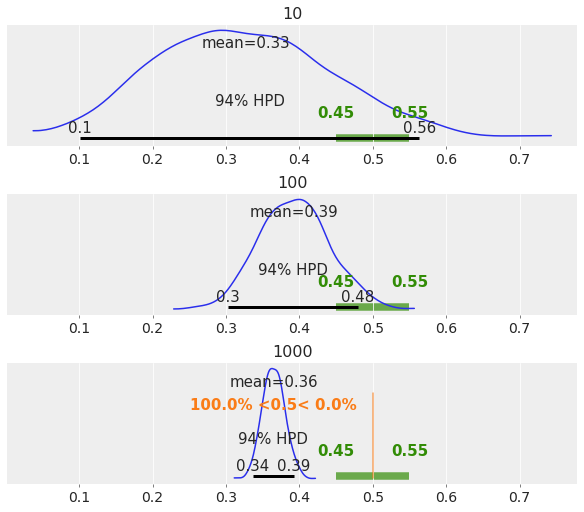

In [ ]:
_,ax = plt.subplots(len(trial_counts), 1, sharex=True, sharey=False,
                    figsize=(8, 7), constrained_layout=True)

for trial_index in range(len(trial_counts)):
    trial_count = trial_counts[trial_index]
    print(trial_count)
    data = stats.bernoulli.rvs(p=theta_real, size=trial_count)
    with pm.Model() as our_first_model:
        # a priori - uniform
        θ = pm.Beta('θ', alpha=1., beta=1.)
        # likelihood p(y|θ)
        y = pm.Bernoulli('y', p=θ, observed=data)
        trace = pm.sample(1000, random_seed=123)
        
    df = az.summary(trace)
    print(df)
    ref_value = 0.5
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=ref_value, ax = ax[trial_index])
    ax[trial_index].set_title(trial_count)
    
